In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.spatial import cKDTree

In [26]:
x = np.arange(8)
y = np.arange(8)
z = np.random.randint(10, size = (8, 8))
xp = np.random.random(size=70)*8 - 0.5
yp = np.random.random(size=70)*8 - 0.5
zp = np.random.randint(10, size = 70)
xc = np.arange(8)
yc = np.arange(8)
grc = np.meshgrid(xc, yc)

In [27]:
tree = cKDTree(np.c_[xp, yp])
dd, ii = tree.query(np.c_[grc[0].ravel(), grc[1].ravel()], k=1)
x_close = xp[ii]
y_close = yp[ii]

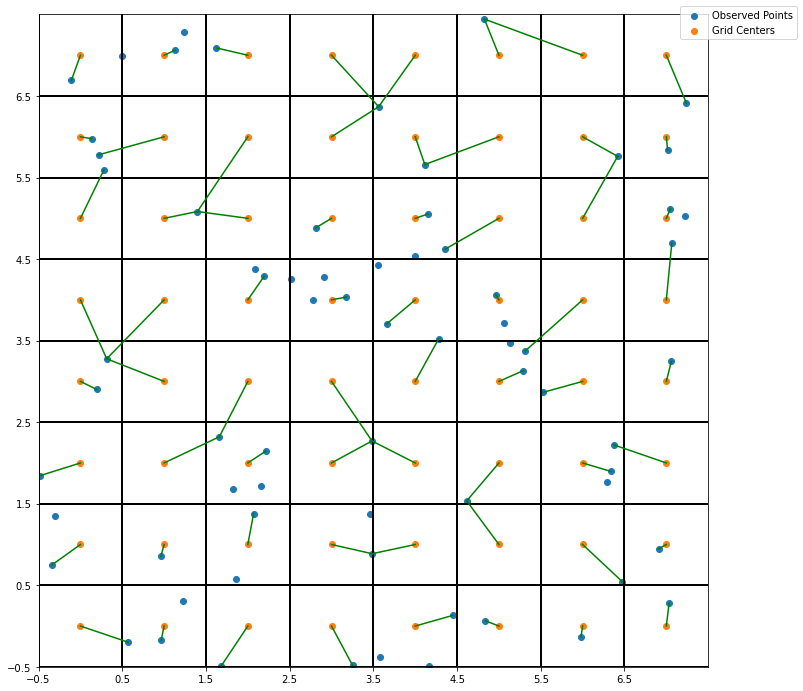

In [28]:
plt.figure(figsize = (12, 12))
plt.xticks(x-0.5)
plt.yticks(y-0.5)
plt.scatter(xp, yp, label='Observed Points')
plt.scatter(grc[0], grc[1], label='Grid Centers')
plt.grid(color='k', linestyle='-', linewidth=2)
plt.xlim((-.5,7.5))
plt.ylim((-.5,7.5))



for i in range(len(ii)):
    plt.plot([grc[0].ravel()[i], xp[ii[i]]], [grc[1].ravel()[i], yp[ii[i]]], c='g')

#plt.text(-0.11, 7.5-0.31, 'A )', bbox=dict(fill=False, edgecolor='r', linewidth=1.25), fontsize=18)

plt.legend(bbox_to_anchor=(.95, 1.02), loc='upper left')

Text(0, 0.5, 'Elevation of interpolated Points')

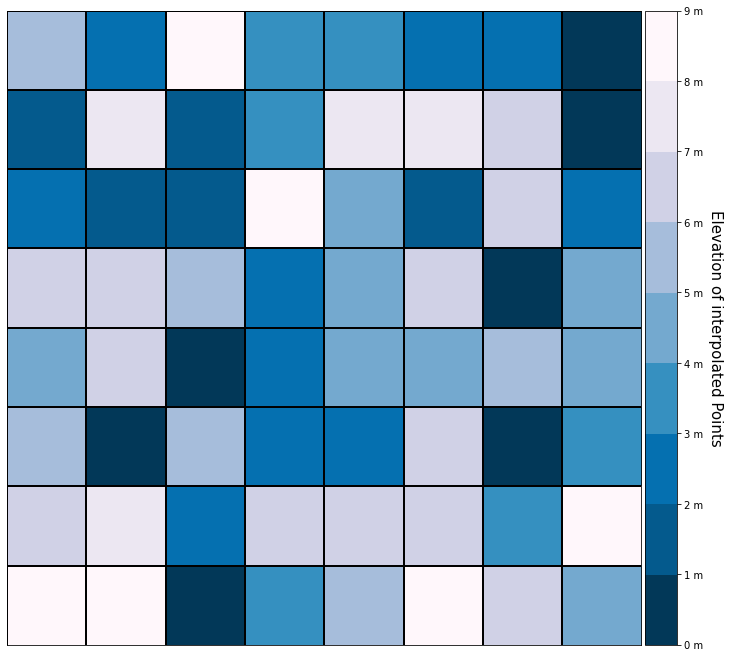

In [29]:
fig, ax = plt.subplots(1, figsize = (12, 12))
ax.set_xticks(x-0.5)
ax.set_yticks(y-0.5)
elv = zp[ii]
elv.shape = z.shape
im = ax.imshow(np.flip(elv, 0), cmap=cm.get_cmap('PuBu_r', 9))
ax.grid(color='k', linestyle='-', linewidth=2)
ax.tick_params('both', bottom=False, top=False, left=False, right=False,
                labelbottom=False, labeltop=False, labelleft=False, labelright=False)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im, ticks=np.arange(10), ax = ax, cax = cax)
cbar.ax.set_yticklabels(['0 m    ', '1 m    ', '2 m    ', '3 m     ', '4 m', '5 m', '6 m', '7 m', '8 m', '9 m'])  
cbar.ax.set_ylabel('Elevation of interpolated Points', rotation=270, fontsize=15)